In [1]:
import os


In [2]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [3]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images/'))

10192

In [4]:
import cv2

In [5]:
img =cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')

In [6]:
import matplotlib.pyplot as plt


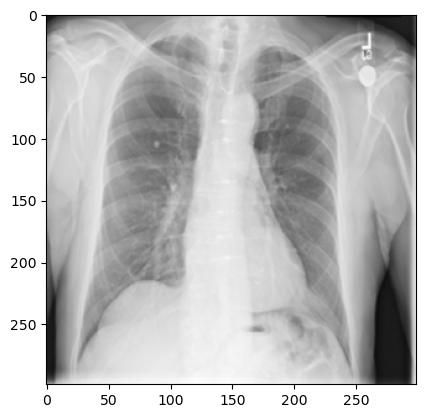

In [7]:
plt.imshow(img)

In [8]:
img.shape

(299, 299, 3)

In [9]:
import pandas as pd


In [10]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')


In [11]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [12]:
urls =os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [13]:
path = "COVID-19_Radiography_Dataset/COVID/images/"+urls[0]

In [14]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

In [26]:
def loadImages(path,urls, target):
  images =[]
  labels =[]
  for i in range(len(urls)):
    img_path = path +"/"+ urls[i]
    img = cv2.imread(img_path)
    img = img/255.0
    # if we want to resize image
    img = cv2.resize(img,(100,100))
    images.append(img)
    labels.append(target)
  return images,labels


In [27]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidurl = os.listdir(covid_path)
covidImages, covigtargest = loadImages(covid_path,covidurl,1)

In [28]:
len(covidurl),len(covidImages)

(3616, 3616)

In [29]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_url = os.listdir(normal_path)
normalImage ,normaltargets = loadImages(normal_path,normal_url,0)

In [30]:
import numpy as np
#covidImages = np.asarray(covidImages)
#normalImage = np.asarray(normalImage)

In [31]:
covidImages.shape

AttributeError: 'list' object has no attribute 'shape'

In [32]:
normalImage.shape

AttributeError: 'list' object has no attribute 'shape'

In [33]:
data =np.r_[covidImages,normalImage]


In [34]:
data.shape

(13808, 100, 100, 3)

In [35]:
tragets = np.r_[covigtargest,normaltargets]

In [36]:
tragets.shape

(13808,)

In [37]:
from sklearn.model_selection import train_test_split

x_train , x_test ,y_train,y_test = train_test_split(data ,tragets,test_size=0.25)


In [40]:
import tensorflow as tf


In [41]:
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense 

In [69]:
model = Sequential([
    Conv2D(32,(3,3),input_shape=(100,100,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
    
])

In [70]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 16)      

In [71]:
model.compile(optimizer='adam',loss = tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [75]:
model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
324/324 [==============================] - 60s 186ms/step - loss: 0.0918 - accuracy: 0.9651 - val_loss: 0.2283 - val_accuracy: 0.9253
Epoch 2/5
324/324 [==============================] - 55s 171ms/step - loss: 0.0770 - accuracy: 0.9704 - val_loss: 0.2308 - val_accuracy: 0.9114
Epoch 3/5
324/324 [==============================] - 54s 167ms/step - loss: 0.0681 - accuracy: 0.9748 - val_loss: 0.1955 - val_accuracy: 0.9432
Epoch 4/5
324/324 [==============================] - 56s 174ms/step - loss: 0.0554 - accuracy: 0.9788 - val_loss: 0.2105 - val_accuracy: 0.9322
Epoch 5/5
324/324 [==============================] - 56s 172ms/step - loss: 0.0455 - accuracy: 0.9834 - val_loss: 0.2099 - val_accuracy: 0.9395


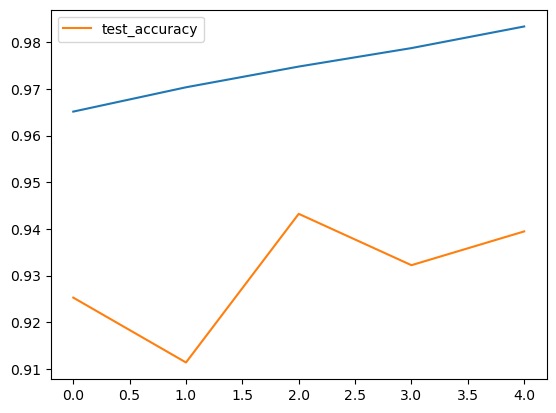

In [76]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()

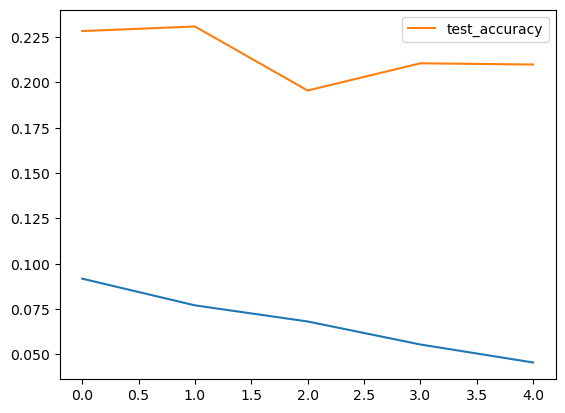

In [77]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'],label='test_accuracy')
plt.legend()
plt.show()